### Importação dos dados



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


#1. Análise do faturamento


In [16]:
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Criando um dicionário para armazenar o faturamento de cada loja, facilitando a visualização
faturamentos = {
    'Loja 1': faturamento_loja1,
    'Loja 2': faturamento_loja2,
    'Loja 3': faturamento_loja3,
    'Loja 4': faturamento_loja4
}

# Exibindo os faturamentos
print("Faturamento por Loja:")
for loja, faturamento in faturamentos.items():
    print(f"{loja}: R$ {faturamento:.2f}")

Faturamento por Loja:
Loja 1: R$ 1534509.12
Loja 2: R$ 1488459.06
Loja 3: R$ 1464025.03
Loja 4: R$ 1384497.58


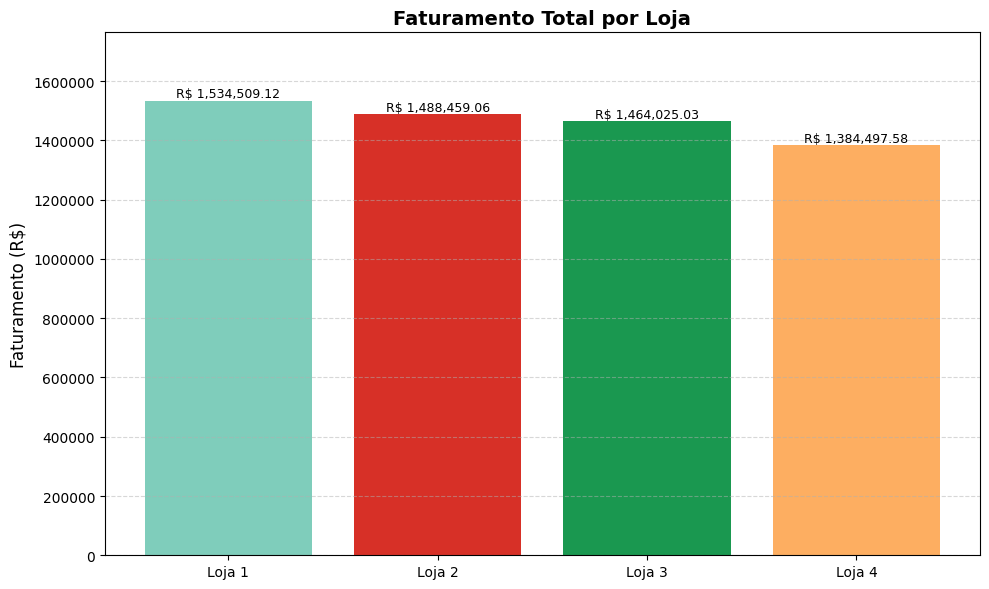

In [23]:
lojas = list(faturamentos.keys())
valores_faturamento = list(faturamentos.values())

plt.figure(figsize=(10, 6))

barras = plt.bar(lojas, valores_faturamento, color=['#7fcdbb', '#d73027', '#1a9850', '#fdae61']) # Cores mais profissionais

for i, valor in enumerate(valores_faturamento):
    plt.text(i, valor + 500, f'R$ {valor:,.2f}', ha='center', va='bottom', fontsize=9)

plt.ylabel('Faturamento (R$)', fontsize=12)
plt.title('Faturamento Total por Loja', fontsize=14, fontweight='bold'
)
plt.ylim(0, max(valores_faturamento) * 1.15)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [28]:

# 1. Unir os DataFrames e adicionar a coluna 'Loja'
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatena (junta) todos os dataframes em um só
df_total = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# 2. Calcular vendas por categoria e por loja
# Contamos a ocorrência de cada categoria por loja
vendas_por_categoria_loja = df_total.groupby(['Categoria do Produto', 'Loja']).size().unstack(fill_value=0)

# O .unstack() transforma as lojas em colunas, facilitando a visualização.
# .fillna(0) preenche categorias que uma loja não vendeu com 0.

print("Vendas por Categoria e por Loja (Contagem de Produtos):\n")
print(vendas_por_categoria_loja)
print("-" * 60)

Vendas por Categoria e por Loja (Contagem de Produtos):

Loja                   Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201
------------------------------------------------------------


<Figure size 1400x800 with 0 Axes>

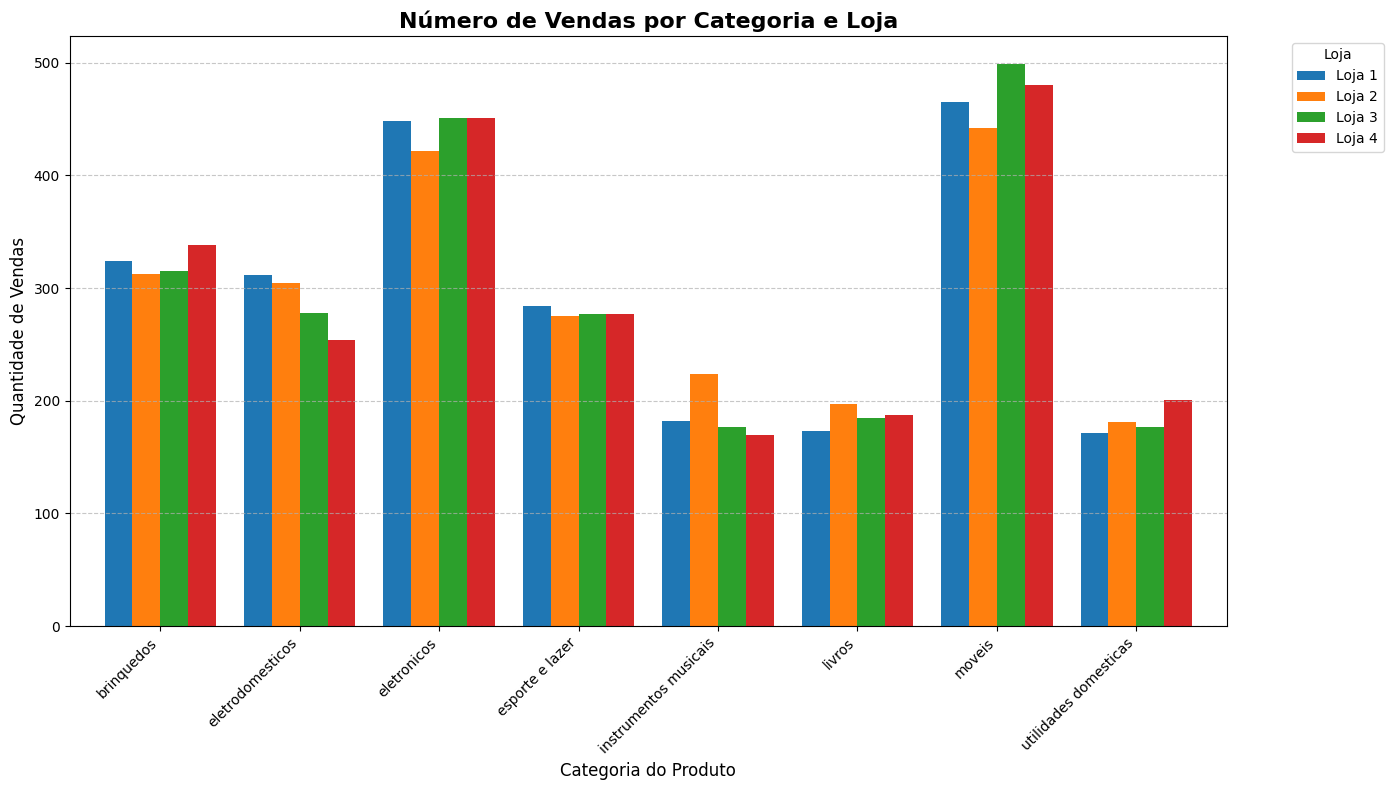

In [29]:
plt.figure(figsize=(14, 8))

vendas_por_categoria_loja.plot(kind='bar', figsize=(14,8), width=0.8)

plt.title('Número de Vendas por Categoria e Loja', fontsize=16, fontweight='bold')
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [44]:

# Calcular a média de avaliação de cada loja
media_avaliacao_loja1 = loja1['Avaliação da compra'].mean() # Corrigido
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean() # Corrigido
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean() # Corrigido
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean() # Corrigido

medias_avaliacoes = {
    'Loja 1': media_avaliacao_loja1,
    'Loja 2': media_avaliacao_loja2,
    'Loja 3': media_avaliacao_loja3,
    'Loja 4': media_avaliacao_loja4
}

print("Média de Avaliação por Loja:")
for loja, media in medias_avaliacoes.items():
    print(f"{loja}: {media:.2f}")
print("-" * 40)


Média de Avaliação por Loja:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00
----------------------------------------


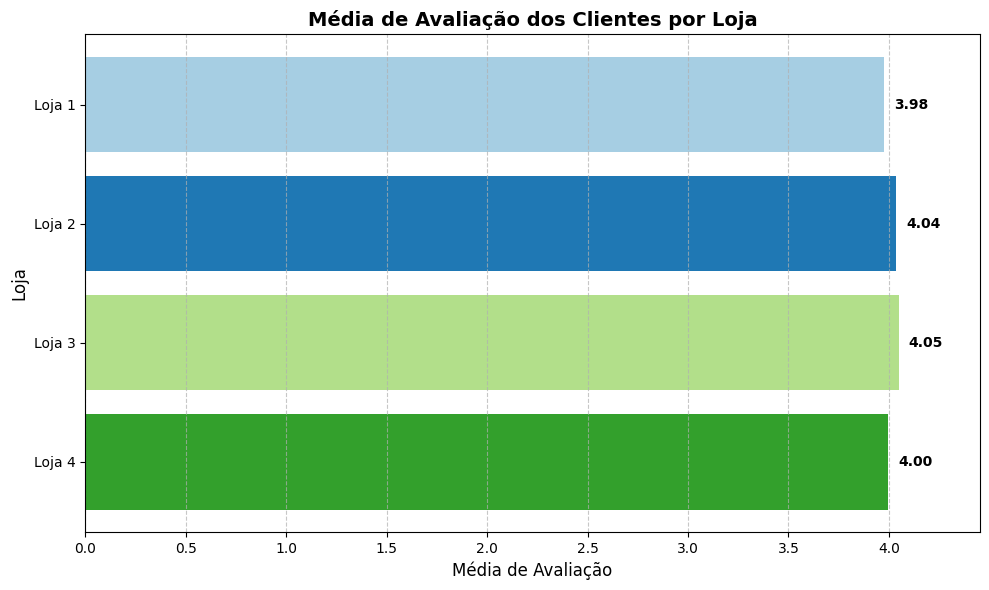

In [45]:
lojas = list(medias_avaliacoes.keys())
valores_medias = list(medias_avaliacoes.values())

plt.figure(figsize=(10, 6))
barras = plt.barh(lojas, valores_medias, color=['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c'])

for i, valor in enumerate(valores_medias):
    plt.text(valor + 0.05, i, f'{valor:.2f}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.xlabel('Média de Avaliação', fontsize=12)
plt.ylabel('Loja', fontsize=12)
plt.title('Média de Avaliação dos Clientes por Loja', fontsize=14, fontweight='bold')

plt.xlim(0, max(valores_medias) * 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [49]:
# Re-criando o DataFrame combinado df_total (importante para que esta célula funcione de forma independente)
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'
df_total = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

print("4. Análise de Produtos Mais e Menos Vendidos (Geral):\n")

# 1. Contar a frequência de cada produto no DataFrame total
contagem_produtos = df_total['Produto'].value_counts()

# 2. Identificar os produtos mais vendidos (Top 5)
produtos_mais_vendidos = contagem_produtos.head(5)
print("Top 5 Produtos Mais Vendidos (Geral):\n", produtos_mais_vendidos)
print("-" * 50)

# 3. Identificar os produtos menos vendidos (Bottom 5)
produtos_menos_vendidos = contagem_produtos.tail(5)
print("Top 5 Produtos Menos Vendidos (Geral):\n", produtos_menos_vendidos)
print("-" * 50)

4. Análise de Produtos Mais e Menos Vendidos (Geral):

Top 5 Produtos Mais Vendidos (Geral):
 Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Name: count, dtype: int64
--------------------------------------------------
Top 5 Produtos Menos Vendidos (Geral):
 Produto
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64
--------------------------------------------------


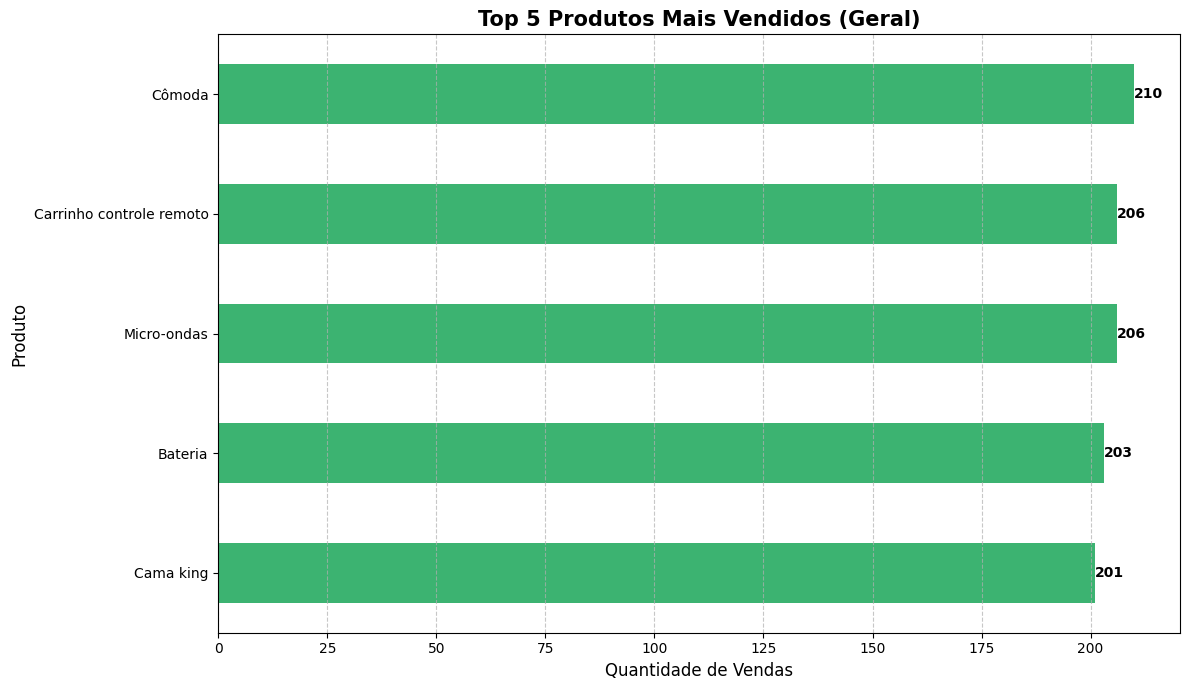

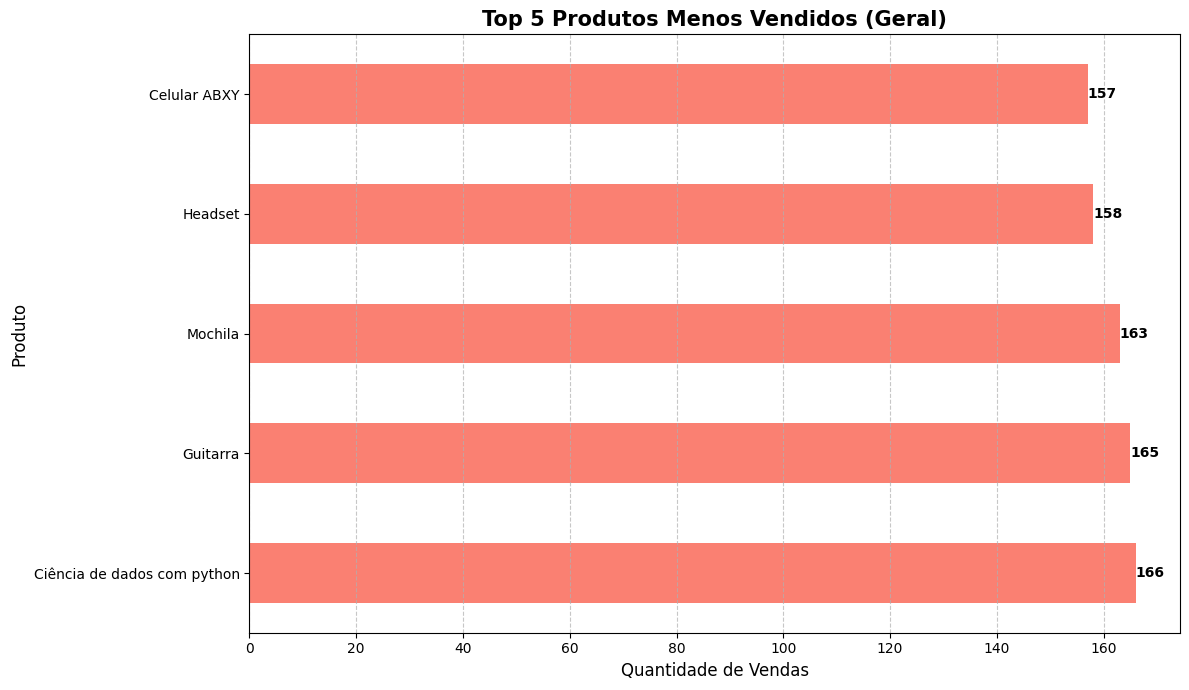

In [50]:
plt.figure(figsize=(12, 7))
produtos_mais_vendidos.sort_values(ascending=True).plot(kind='barh', color='mediumseagreen')
# sort_values(ascending=True) para que o maior valor fique no topo do gráfico horizontal
plt.title('Top 5 Produtos Mais Vendidos (Geral)', fontsize=15, fontweight='bold')
plt.xlabel('Quantidade de Vendas', fontsize=12)
plt.ylabel('Produto', fontsize=12)

# Adiciona os valores nas barras
for index, value in enumerate(produtos_mais_vendidos.sort_values(ascending=True)):
    plt.text(value, index, f'{value}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico para os Produtos Menos Vendidos
plt.figure(figsize=(12, 7))
produtos_menos_vendidos.sort_values(ascending=False).plot(kind='barh', color='salmon')
# sort_values(ascending=False) para que o menor valor fique na parte inferior do gráfico horizontal
plt.title('Top 5 Produtos Menos Vendidos (Geral)', fontsize=15, fontweight='bold')
plt.xlabel('Quantidade de Vendas', fontsize=12)
plt.ylabel('Produto', fontsize=12)

# Adiciona os valores nas barras
for index, value in enumerate(produtos_menos_vendidos.sort_values(ascending=False)):
    plt.text(value, index, f'{value}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [52]:
frete_medio_loja1 = loja1['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

fretes_medios = {
    'Loja 1': frete_medio_loja1,
    'Loja 2': frete_medio_loja2,
    'Loja 3': frete_medio_loja3,
    'Loja 4': frete_medio_loja4
}

print("Frete Médio por Loja:")
for loja, frete in fretes_medios.items():
    print(f"{loja}: R$ {frete:.2f}") # Formatando para 2 casas decimais
print("-" * 40)

Frete Médio por Loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28
----------------------------------------


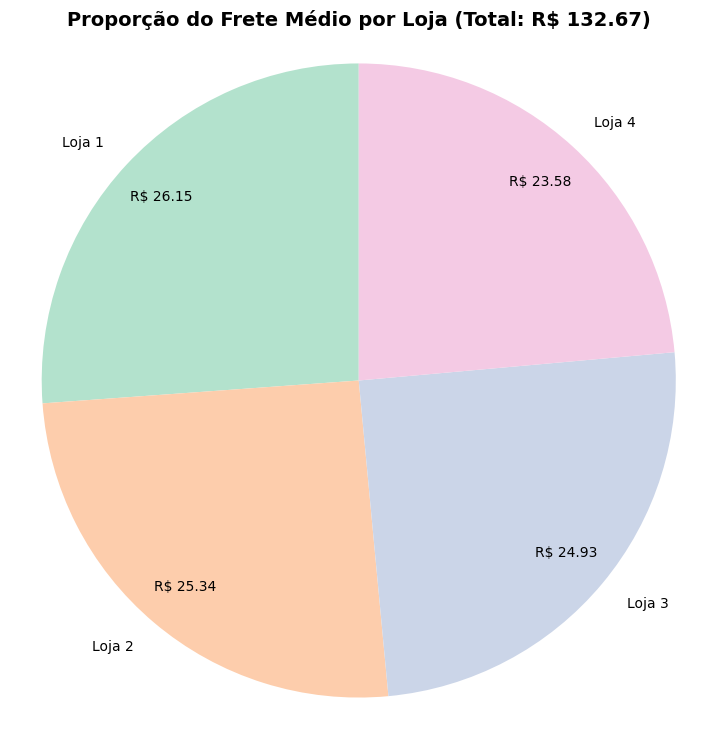

In [54]:
lojas = list(fretes_medios.keys())
valores_fretes = list(fretes_medios.values())

plt.figure(figsize=(9, 9)) # Gráficos de pizza geralmente ficam melhores em figuras quadradas

# Cria o gráfico de pizza
plt.pie(
    valores_fretes,
    labels=lojas,
    autopct='R$ %.2f', # Formato para exibir o valor exato no slice (com 'R$')
    startangle=90,      # Inicia a primeira fatia do topo
    colors=['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4'], # Cores para as fatias
    pctdistance=0.85    # Posição da porcentagem dentro do slice
)

plt.title('Proporção do Frete Médio por Loja (Total: R$ {:.2f})'.format(sum(valores_fretes)), fontsize=14, fontweight='bold')
plt.axis('equal') # Garante que o círculo seja desenhado como um círculo
plt.show()

### **Introdução**

Avaliamos dados de faturamento, categorias de produtos vendidos, média de avaliações dos clientes, produtos mais e menos vendidos e o frete médio.

# **Desenvolvimento**
**Faturamento Total:** A Loja 4 teve o menor faturamento (R$ 1.384.498), ficando atrás das outras três lojas.

**Categorias de Produtos:** A categoria mais vendida foi Móveis em todas as lojas, mas a Loja 4 não se destaca em nenhuma categoria que possa compensar o baixo faturamento.

**Avaliação dos Clientes:** A Loja 4 teve média de 4,00 (abaixo da Loja 3 e Loja 2) e não lidera em satisfação dos clientes.

**Produtos Vendidos:** A Loja 4 não apresentou vantagem competitiva nos produtos mais vendidos (Cômoda) nem nos menos vendidos (Celular ABXY).

**Frete Médio:** Apesar de ter o menor frete médio (R$ 31,28), isso não refletiu em melhores resultados gerais.

**Conclusão:**
Com o pior faturamento, média de avaliação e sem destaque em vendas, a Loja 4 é a menos eficiente. Recomenda-se, portanto, que o Sr. João venda a Loja 4 para investir em um novo empreendimento.